In [80]:
from matricesRalas import MatrizRala, GaussJordan
import numpy as np

# Crear una instancia de MatrizRala de tamaño suficiente para incluir todos los índices dados
W = MatrizRala(11, 11)  # Asumo que la matriz debe ser lo suficientemente grande para cubrir todos los índices proporcionados

# Lista de coordenadas (fila, columna)
coordenadas = [
    (0, 2), # C cita a A
    (0, 3), # D cita a A
    (0, 4), # E cita a A
    (1, 0), # A cita a B
    (4, 10),# K cita a E
    (5, 0), # A cita a F
    (5, 6), # G cita a F
    (6, 0), # A cita a G
    (6, 7), # H cita a G
    (6, 8), # I cita a G
    (7, 8), # I cita a H
    (8, 5), # F cita a I
    (9, 8)  # I cita a J
]

# Asignar el valor 1 a las posiciones dadas
for fila, columna in coordenadas:
    W[fila, columna] = 1

# Ahora A tiene todos los valores asignados según las coordenadas
print(W)  # Asumo que la clase MatrizRala tiene un método __str__ o similar para imprimir la matriz


MatrizRala([ 
    [ 0 0 1 1 1 0 0 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
    [ 1 0 0 0 0 0 1 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 1 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
])


In [81]:
from matricesRalas import MatrizRala

# Crear una instancia de MatrizRala de tamaño 11x11
D = MatrizRala(11, 11)

# Asignar el valor 1 a la diagonal principal
for i in range(11):
    D[i, i] = 1
D[0,0]=1/3
D[8,8]=1/3
D[1,1]=0
D[9,9]=0


# Ahora A tiene la diagonal principal con todos los valores iguales a 1
print(D)

MatrizRala([ 
    [ 0.3333333333333333 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 1 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 1 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 1 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 1 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 1 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0.3333333333333333 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
])


In [82]:

# from matricesRalas import MatrizRala
# def crearD(mat):
    
#     # Crear una nueva matriz de ceros con las mismas dimensiones
#     nueva_matriz = MatrizRala(*mat.shape)
    
#     # Calcular la cantidad de unos en cada columna

#     for j in range(mat.shape[1]):
#         cantidad_unos = 0
#         for k in range(mat.shape[0]):
#             cantidad_unos = cantidad_unos + mat.__getitem__((k,j))
#         if cantidad_unos > 0:
#             nueva_matriz[j, j] = 1 / cantidad_unos
#         else:
#             nueva_matriz[j,j]=0
    
#     return nueva_matriz


# D = crearD(W)
# print(D)

In [83]:
N = 11
d = 0.85
I = MatrizRala(N, N)
for i in range(N):
    I[i, i] = 1

# Construimos la matriz A = I - d * W * D
multi = W.__matmul__( D)
#multi= W @ D
multixd= multi.__rmul__(d)
A=I.__sub__(multixd)

# Vector b
b = ((1 - d) / N) * np.ones(N)

# Convertimos b a MatrizRala para compatibilidad
b_rala = MatrizRala(N, 1)
for i in range(N):
    b_rala[i, 0] = b[i]

In [84]:

print(A)
print(b_rala)
print(multi) 
print(multixd) 


MatrizRala([ 
    [ 1.0 0.0 -0.85 -0.85 -0.85 0.0 0.0 0.0 0.0 0.0 0.0 ]
    [ -0.2833333333333333 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
    [ 0 0 1 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 1 0 0 0 0 0 0 0 ]
    [ 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 -0.85 ]
    [ -0.2833333333333333 0.0 0.0 0.0 0.0 1.0 -0.85 0.0 0.0 0.0 0.0 ]
    [ -0.2833333333333333 0.0 0.0 0.0 0.0 0.0 1.0 -0.85 -0.2833333333333333 0.0 0.0 ]
    [ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -0.2833333333333333 0.0 0.0 ]
    [ 0.0 0.0 0.0 0.0 0.0 -0.85 0.0 0.0 1.0 0.0 0.0 ]
    [ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.2833333333333333 1.0 0.0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
])
MatrizRala([ 
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
])
MatrizRala([ 
    [ 0 0 1 1 1 0 0 0 0 0 0 

$$p^* = \frac{1-d}{N} \mathbb{1} +d WDp^*$$

In [85]:
nasty=GaussJordan(A,b_rala)
print(nasty)


MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892239 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


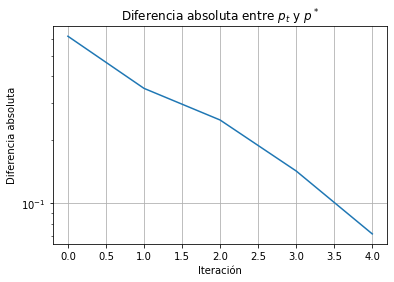

Resultado de Gauss-Jordan: MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892239 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])
Resultado del método iterativo: MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.13380414772727273 ]
    [ 0.1309171527777778 ]
    [ 0.05772464015151516 ]
    [ 0.1197507070707071 ]
    [ 0.05772464015151516 ]
    [ 0.01363636363636364 ]
])


In [86]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_iterativo(W, D, d=0.85, tol=0.0000005, max_iter=5):
    N = W.shape[0]
    p_t = MatrizRala(N, 1)
    
    # Inicializar p_t con distribución equiprobable
    for i in range(N):
        p_t[i, 0] = 1 / N
    
    diferencias = []
    
    for iteration in range(max_iter):
        p_t_next = MatrizRala(N, 1)
        
        # Calcular p_t_next usando la fórmula iterativa
        for i in range(N):
            sum_wdp = sum(d * W[i, j] * D[j, j] * p_t[j, 0] for j in range(N) if W[i, j] != 0)
            p_t_next[i, 0] = sum_wdp + (1 - d) / N
        
        # Calcular la diferencia absoluta
        diferencia = sum(abs(p_t_next[i, 0] - p_t[i, 0]) for i in range(N))
        diferencias.append(diferencia)
        
        # Verificar convergencia
        if diferencia < tol:
            break
        
        p_t = p_t_next
    
    return p_t, diferencias

# Ejecutar el método iterativo
p_iterativo, diferencias = metodo_iterativo(W, D)
# Graficar la diferencia absoluta
plt.plot(diferencias)
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Diferencia absoluta')
plt.title('Diferencia absoluta entre $p_t$ y $p^*$')
plt.grid(True)
plt.show()

# Comparar los resultados de Gauss-Jordan y el método iterativo
print("Resultado de Gauss-Jordan:", nasty)
print("Resultado del método iterativo:", p_iterativo)